# Homework 4 - Hard coding
Goal of the homework: write important algorithms and functions from scratch.

[Here](https://github.com/CriMenghini/ADM/tree/master/2020/Homework_4) You can find the full specifications of the **Homework 4**

**NB:** The functions are in a separate file in this repository, called `functions.py`

Some functions are not runned again because of it was too time consuming

# 1. Hashing

Download the datasets [here](https://drive.google.com/file/d/19SD2db0dH2A0QLJOmBHnkbqOX6SbERcY/view). You will find a `hash.txt` file.

1. Implement your hash functions from scratch, no ready-made hash functions are allowed. Read the class material and search the internet if you need to. As a reference, it may be useful to look at the description of hash functions in the book or here.
2. Use your hash function, implement a HyperLogLog structure.
3. Read the dataset sequentially and add it to your HyperLogLog.
4. At the end you have to provide:
    * The cardinality of the dataset.
    * The error of your filter.

In [2]:
import pandas as pd
from math import log2
import numpy as np
from functions import *      #function we've created

We load the txt file and see that it is composed by 139000000 rows 

In [4]:
data = pd.read_csv('hash.txt', header = None)

In [5]:
data

,0
0,844082e02a27ddee8d99ea1af94a2969
1,ff96d6665b5c59d3a70bb8f2ba4f10be
2,b64a85884e2b159829331c19e05dbac9
3,1c8836719e84867c26ba2cfeb372c53d
4,b66f73ffd9008d9c99159e164261df51
...,...
138999995,84f48cbf9aa048ddada7e47d70ee7d47
138999996,dbce076164042cb808a0be005a307545
138999997,b175ab844ab7ec3c803a0e86a9033729
138999998,f0a6061d411a90921922eb5716caafc9


We decide to insert the elements in a list

In [6]:
#create a list with all the elements
lis=[]
for i in range(0,len(data[0])):
    lis.append(data[0][i])

## Hash function

We apply our hash function to the hexadecimal values in the list.

We decide to implement a simple hash value that is enough accurate to our scope.
In fact, since we have to implement the HyperLogLog algorithm and it takes in input a binary values, we decide to transform every hexadecimal in a decimal number and compute de module of a large enough number $2^{32}) $

In [7]:
#we apply hash function 

for i in range(0,len(lis)):
        lis[i]=Hash(lis[i])

For the HyperLogLog we need binary value. 

We create a function to convert a number into a 32-bit binary number.
We apply the function to our hashed value and store them in a list containing the binary values.

In [8]:
#create a list with the binary values
binlist=[]
for i in range(0,len(lis)):
    binlist.append(binalinator(lis[i]))

## HyperLogLog algorithm

We initialize m and b value that we need for the HyperLogLog algorithm

In [9]:
# value of m and b
m=2048       
b=int(log2(m))

We create a np array of zeros

In [10]:
HLL=np.zeros(2**b)

We read the dataset sequentially and add it to our HyperLogLog

In [11]:
for i in range(len(binlist)):
    string=binlist[i]
    j= int(address(string,b),2)
    w=position_leftmost_1(remaining(string,b))
    HLL[j]=max(HLL[j],w)

### Cardinality of the dataset and error of the filter

We create a function to find cardinality of the dataset the error of our filter.


In [13]:
cardinality,error = cardinality_error(HLL,m)

In [17]:
print('The cardinality is: ',cardinality)

The cardinality is:  120565840.71729475


In [16]:
print('The error is: ', error*100, '%')

The error is:  2.2980970388562794 %


# 2. Clustering

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot  as plt
import statistics
from tqdm import tqdm
import seaborn as sns
import random

from sklearn.cluster import KMeans
import spacy
import time
from langdetect import detect
import nltk
import math

import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer


from math import *
import random

import numpy.matlib
from sklearn.metrics.pairwise import euclidean_distances


#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from mpl_toolkits import mplot3d
import pickle
from functions import *


### Loading Data Set:

In [2]:
#loading data
data = pd.read_csv("Reviews.csv",encoding='utf-8')

###  Dealing with missing values :
This step can be assumed as first step in working with any kind of data set. 
We check the presence of missing values in whole data set and as we can see in result we just 
have few missinf value in Product Name columns and Columns related to Summary of data.
Since the type of data at these two columns are string we simply replace missing values 
with empty strings.

In [3]:
# checking the presence of missing values :
data.isnull().sum()
# as we can see there are no that much missing values and we just have 16 missing values in profileName columns
# and 27 i Summary columns 

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [4]:
# dealing with missing values 
data['ProfileName'].fillna('',inplace = True)
data['Summary'].fillna('',inplace = True)

In [5]:
# ti get sure we did everything well and just those specific columns replace we check them again 
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [6]:
slice1 = data.iloc[:]

###  Methodology of Preorocessing Data Set : </font>
After dealing with data set to find reasonablresult we shoud process string format data.
This step is essential and among too many available methods to do this we take following steps:

1. --> Eliminate puctuation

2. --> Converting each word to lower case 

3. --> eliminating Stop Words 

4. --> Choosing English Words 

5. --> Steeming **


** Steeming can be explained as mapping a group of words to the same stem, stems maybe not meaningfull or valid vocabulary in Language but the goal of this process is reducing infelection in words to their root.

cleaning, stemming and removing stopwords from our data

process_data(slice1)

slice1.to_csv("slice1")

In [7]:
slice1 = pd.read_csv("slicestemmed.csv")

global_list = global_lis(slice1)

global_dict = global_dictionary(global_list )

with open("vocabulary.pkl", "wb") as f:
         pickle.dump(global_dict,f)

In [8]:
with open("vocabulary.pkl", "rb") as f:
        global_dict = pickle.load(f)

### Methodology to choose most important and influencing words :
now we aiam to just keep the most important words. We supposed that words with highest number of reputation cannot carry lots of information because they can be usuall adjectives such as "good","beautiful",... .

To avoid the influence of these words we work with almost 35% quantile of data. We eliminaye the 1% of highest repeated words and also more than 40% percent of data just repeated less than 4 times so to eliminate the impact of these vocabularies we uase statistical quantiles of data.

We assumed our lower bound as any word that is in quantile bigger that 66 and we also define our uupper bound as any word in less that quantile equal to 99 .

After creating boundries we choose vocabularies between boundries so on the other words we create reduced form of vocabulary and just keep ones with most information and reasonable number of repeat and named this reduced form important words.

At last step we add extra columns that keep these important words for us and called it Important_Words .

In [19]:
[lower_bound , upper_bound]=quantile_finder(global_dict)

In [16]:
important_dict = main_words(global_dict , lower_bound , upper_bound)

In [19]:
important_list = []

for key , values in important_dict.items():   
    important_list.append(key)


In [20]:
# now we add one extra columns to our data that include just stem importsnt words 
# def important_text_process(text,important_dict,dictionary_word)           

In [14]:
def important_column_data(data):
    
    data['Important_Words']=data['clean_text'].apply(lambda x : important_text_process(x ,important_dict))

In [21]:
important_column_data(slice1)

In [23]:
unique_products = slice1.ProductId.unique()
len(unique_products)

2656

### Creating Data Frame :
in this part we create data frame with columns equal to unique values of all important words and each row repreasent unique product ID and each cell represenr tf-idf of corresponding word in all merged reviews of that specific product ID simply if the word is not represented in reviews of that product ID its corresponding tf-idf is zero

In [3]:
#code below

IDF = IDF_calculator(slice1,unique_products)

with open("IDF.pkl", "wb") as f:

        pickle.dump(IDF,f)

In [17]:
with open("IDF.pkl", "rb") as f:
        IDF = pickle.load(f)

p = unique_products

n = len(p)
m = len(important_list)

product_vector = np.zeros((n,m))        #matrix that has for each unique productID (row), all the scores for each word in
                                        #the final_dictionary (columns): 0 if the word is not present, tf-idf score otherwise
d = pd.DataFrame(product_vector, index = p, columns = important_list)   
d
for i in range(n):
    
    a = p[i]
    num_product = i
    index = (np.where(slice1['ProductId'] == p[int(num_product)]))[0].tolist()
    tf = tf_calculator(slice1,p,num_product)

    for word in tf:
        d[word][i] = tf[word] * IDF[word]
d.to_csv("tf_idf.csv")

In [27]:
d= pd.read_csv("tf_idf.csv",index_col=0)
d

,Unnamed: 0,vital,stew,labrador,finicki,jumbo,unsalt,error,vendor,intend,...,argon,macmat,lemi,smarte,anchiovi,croton,momvox,momvoxbox,granadilla,b003jo0vv2
0,B001E4KFG0,0.0,0.0,0.0,0.0,1.5,0.625,0.625,0.375,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B00813GRG4,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B000LQOCH0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B000UA0QIQ,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B006K2ZZ7K,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74253,B000H7K114,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74254,B001EO7N10,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74255,B003S1WTCU,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74256,B004I613EE,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SVD Method :
althogh once we reduce the dimentionality of our data through passing from quantile functions after creating our data frame we realize it is still big and to reduce its dimentinality according to its structure which is sparce matrix, we use Singular Value Decomposition. To choose the proper number for numeber of component that includes most variability and information best amont that we found is 70. Actually it is fair number to explained variability of data. It explained more that 80% of informations.

In [32]:
svd = TruncatedSVD(n_components = 70,n_iter=3, random_state=42)
svd.fit(d)
components = svd.components_
features = important_list

In [33]:
relevant_words = get_relevant_words(components, features)
print(len(relevant_words))

1007


In [36]:
### adding columns of relevant word to data set

data_frame = d[relevant_words]

data_frame

data_frame.to_csv("dataframe")

In [19]:
data_frame= pd.read_csv("data_frame.csv")

data_frame.set_index('Unnamed: 0',inplace=True)
data_frame


,Unnamed: 0,pad,complain,sad,ideal,blackberri,greeni,teavana,aid,halloween,...,75,joe,u,taffi,drive,class,onto,grade,station,neg
0,B001E4KFG0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,B00813GRG4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,B000LQOCH0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,B000UA0QIQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0
4,B006K2ZZ7K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74253,B000H7K114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
74254,B001EO7N10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
74255,B003S1WTCU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
74256,B004I613EE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


### Elbow Method

We use the Elbow Method, in cluster analysis, to determine the optimal number of clusters. 
The plot of the variation of the function help us to understand which is the number of clusters in a dataset. In fact in the chart we can see if there is an inflection/curve, "an elbow", and it represents the number we're looking for.

In [149]:
from tqdm import tqdm
#slice = dataset.iloc[:,4:7]
elbow = {}
for k in tqdm(range(2, 30)):
    elbow_model = KMeans(n_clusters=k)
    elbow_model.fit_predict(data_frame)
    elbow[k] = elbow_model.inertia_

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [17:29<00:00, 37.47s/it]


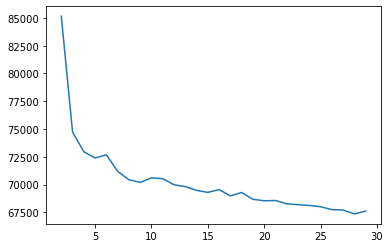

In [151]:
plt.plot(list(elbow.keys()),list(elbow.values()))
#it seems the best k is 13
k=13

In [60]:
initialCentroids_index = random.sample(range(0, len(data_frame)), k) # it gives us address of initial vectors as centroids
print('we start with initial centorids index =',initialCentroids_index)

we start with initial centorids index = [67489, 56500, 28584, 15306, 12740, 73446, 55214, 15772]


In [61]:
vectors = np.array(data_frame)

In [62]:
initial_centroids = []
for i in initialCentroids_index:
    initial_centroids.append(vectors[i])
len(initial_centroids)

8

In [63]:
[new_centroids,clusters] = k_means(vectors,initial_centroids)



new cluster with variance equal to =  [0.004020518862363247]
inner variance for clusters = [0.004713720307382364, 0.00480298532592019, 0.00539760327709997, 0.004756358642752119, 0.003784833068017025, 0.004381342929583446, 0.004050684198131671, 0.02001983351858]
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
new cluster with variance equal to =  [0.005207080864409871]
inner variance for clusters = [0.004746092304530133, 0.004904112276957589, 0.004764170967672618, 0.02549603738544097, 0.004416624884659956, 0.0038415463385091256, 0.004115959555568127, 0.0026318498116987676]
---------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

with open("new_centroids.pkl", "wb") as f:

         pickle.dump(new_centroids,f)
        
with open("clusters.pkl", "wb") as f:

         pickle.dump(clusters,f)       
        

In [17]:
with open("clusters.pkl", "rb") as f:
        clusters = pickle.load(f)   
        
with open("new_centroids.pkl", "rb") as f:
        new_centroids = pickle.load(f)             

### KMeans ++ Method :

The K-Means algorithm is an unsupervised learning algorithm centroid-based. It categorizes the items of a dataset into k clusters.

K-Means ++ is pretty similar to the first one, but it give a smarter initialization of the centroids, avoiding the problem of the initialization sensitivity that we have taking the initial k-centroids randomly.

In [102]:
data_frame_KMeans = data_frame 
data_frame_KMeans

,pad,complain,sad,ideal,blackberri,greeni,teavana,aid,halloween,student,...,joe,u,taffi,drive,class,onto,grade,station,neg,cluster_number
B001E4KFG0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B00813GRG4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B000LQOCH0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B000UA0QIQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B006K2ZZ7K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000H7K114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B001EO7N10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4
B003S1WTCU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
B004I613EE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1


In [103]:
model = KMeans(n_clusters=8)
cluster_labels = model.fit_predict(data_frame_KMeans)
data_frame_KMeans['Cluster_sklearn'] = cluster_labels
data_frame_KMeans

,pad,complain,sad,ideal,blackberri,greeni,teavana,aid,halloween,student,...,u,taffi,drive,class,onto,grade,station,neg,cluster_number,Cluster_sklearn
B001E4KFG0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,4
B00813GRG4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,4
B000LQOCH0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,4
B000UA0QIQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,1,4
B006K2ZZ7K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000H7K114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,4
B001EO7N10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4,2
B003S1WTCU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1
B004I613EE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,4


In [104]:
data_frame_KMeans['Cluster_sklearn'].value_counts()

4    66882
1     4177
3     1585
2     1203
6      124
0      110
5       99
7       78
Name: Cluster_sklearn, dtype: int64

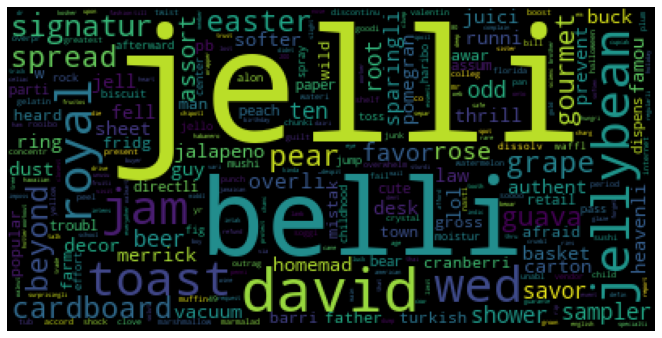

In [120]:
clus_df = data_frame_KMeans[data_frame_KMeans.Cluster_sklearn == 4]
sum_scores = clus_df.sum(axis=0)
sum_scores
words = dict(zip(data_frame_KMeans.columns[:-1],sum_scores[:-1]))
Cloud = wordcloud.WordCloud(max_words=len(words)).generate_from_frequencies(words)
plt.figure(figsize = (9, 5), facecolor = None) 
plt.imshow(Cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
  

## <font color='purple'> Questions:

### Methodology to Extract related information of each cluster :¶
Since we need to groupby our data set based on clusters that we found. We extact the product ID of each cluster and at next step we add new columns to our data set wich represent the cluster number of all information at same row. After this we will be able to easily groupby our data set based on clusters number and extract any information that we need about clusters.

In [76]:
matrix_dict = {}
matrix_dict_zero =[]
for product in unique_products :
    key = data_frame.loc[product]
    if  tuple(list(key)) not in matrix_dict:
        matrix_dict[tuple(list(key))] = product
    else:
        matrix_dict_zero.append(product)
        matrix_dict_zero.append(tuple(list(key)))


In [77]:
cluster_list = []
for key ,values in clusters.items() :
    cluster_list.append(clusters[key])

In [78]:
cluster_appender = {}
extra_product = []
for i in range(len(cluster_list)):
    
    for j in range(len(cluster_list[i])):
        
         if tuple(list(cluster_list[i][j])) in matrix_dict :
                product_id = matrix_dict[tuple(list(cluster_list[i][j]))]
                if product_id not in cluster_appender:
            
#                 product_id = matrix_dict[tuple(cluster_list[i][j])]
                    cluster_appender[product_id] = (i+1)
                else:
                    product_id_index = (matrix_dict_zero.index(tuple(list(cluster_list[i][j]))))-1
                    extra_product.append(matrix_dict_zero[product_id_index])
                    extra_product.append(i+1)
            

In [123]:
def cluster_producer(data):
    
    data['cluster_number']=data['ProductId'].apply(lambda x : cluster_specification(x,cluster_appender ,extra_product ))

In [124]:
cluster_producer(slice1)

In [125]:
slice1 #=slice1.drop(columns="cluster_number")

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Time_set,clean_text,Important_Words,cluster_number
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,bought sever vital can dog food product found ...,"[vital, stew, labrador, finicki]",1
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,product arriv label jumbo salt peanut peanut a...,"[jumbo, unsalt, error, vendor, intend, repres,...",1
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,confect around centuri light pillowi citru gel...,"[confect, centuri, pillowi, citru, gelatin, fi...",1
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,look secret ingredi robitussin believ found go...,"[secret, robitussin, root, beer, medicin]",1
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,great taffi great price wide assort yummi taff...,"[taffi, wide, assort, taffi, taffi]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09,great sesam chicken good better restur eaten h...,"[sesam, restur]",4
568450,568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09,disappoint flavor chocol note especi weak milk...,[thicken],0
568451,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21,star small give 10 15 one train session tri tr...,"[session, ceaser, hyper]",1
568452,568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13,best treat train reward dog good groom lower c...,"[reward, groom, doggi, nose]",1


In [126]:
len(data_frame.index)
c = []
for i in range(len(data_frame.index)):
    c.append(cluster_specification(data_frame.index[i],cluster_appender ,extra_product ))

In [127]:
data_frame['cluster_number'] = c

In [129]:
data_frame

,pad,complain,sad,ideal,blackberri,greeni,teavana,aid,halloween,student,...,u,taffi,drive,class,onto,grade,station,neg,Cluster_sklearn,cluster_number
B001E4KFG0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,1
B00813GRG4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,1
B000LQOCH0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,1
B000UA0QIQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,5,1
B006K2ZZ7K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000H7K114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,1
B001EO7N10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,4
B003S1WTCU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,0
B004I613EE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,1


In [135]:
data_frame = data_frame.drop(columns = 'Cluster_sklearn')

In [90]:
data_frame

,pad,complain,sad,ideal,blackberri,greeni,teavana,aid,halloween,student,...,joe,u,taffi,drive,class,onto,grade,station,neg,cluster_number
B001E4KFG0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B00813GRG4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B000LQOCH0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B000UA0QIQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B006K2ZZ7K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000H7K114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
B001EO7N10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4
B003S1WTCU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
B004I613EE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1


## Question 1: Identify the kind of products in the cluster (e.g., chips, tea, coffee) using a visualization called word cloud.

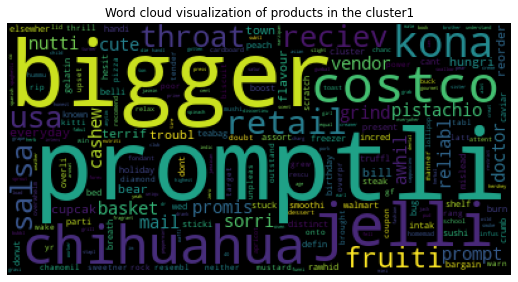

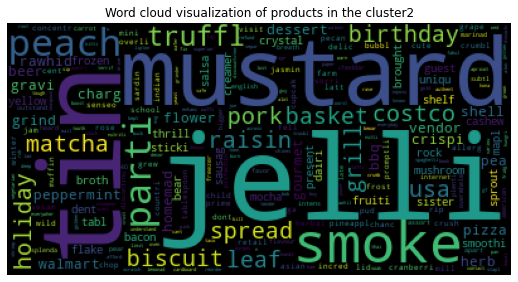

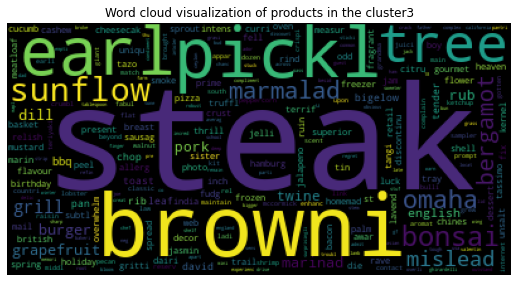

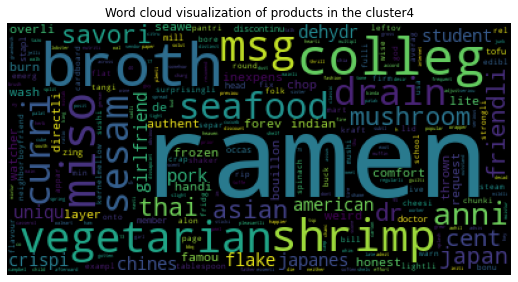

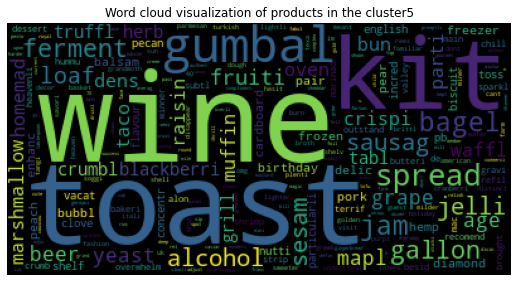

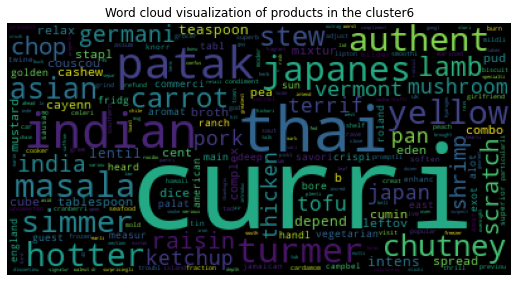

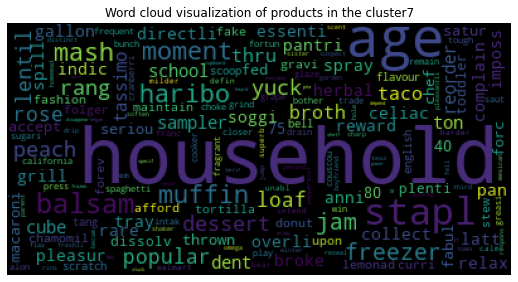

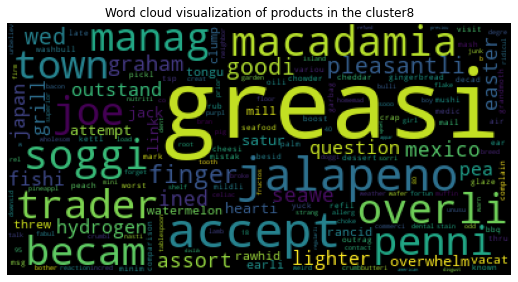

In [92]:
for i in range(k):
    clus_df = data_frame[data_frame.cluster_number == i]
    sum_scores = clus_df.sum(axis=0)
    sum_scores
    words = dict(zip(data_frame.columns[:-1],sum_scores[:-1]))
    try:
        Cloud = wordcloud.WordCloud(max_words=len(words)).generate_from_frequencies(words)
    except: 
        continue

    plt.figure(figsize = (7, 9), facecolor = None) 
    plt.imshow(Cloud) 
    plt.axis("off") 
    plt.title('Word cloud visualization of products in the cluster'+str(i+1))
    plt.tight_layout(pad = 0) 
    plt.show()


as you can see most of the clusters have reasonable results like browni,steak, wine etc

there are some un-meanniungful vocabulary that might seems strange, but they are resonable results because we're appling the lemmatization of the words and the stemming. Using this method the words came back to their root. there might be some roots that are not meaningfull in the language.

## Comparisons

In [161]:
clus_df = data_frame[data_frame.cluster_number == 1]
sum_scores = clus_df.sum(axis=0)
sum_scores
words = dict(zip(data_frame.columns[:-1],sum_scores[:-1]))
ax1 = wordcloud.WordCloud(max_words=len(words)).generate_from_frequencies(words)

In [144]:
data_frame_KMeans = data_frame_KMeans.drop(columns = 'cluster_number')


In [172]:
clus_df = data_frame_KMeans[data_frame_KMeans.Cluster_sklearn == 4]
sum_scores = clus_df.sum(axis=0)
sum_scores
words = dict(zip(data_frame_KMeans.columns[:-1],sum_scores[:-1]))
ax2 = wordcloud.WordCloud(max_words=len(words)).generate_from_frequencies(words)

(-0.5, 399.5, 199.5, -0.5)

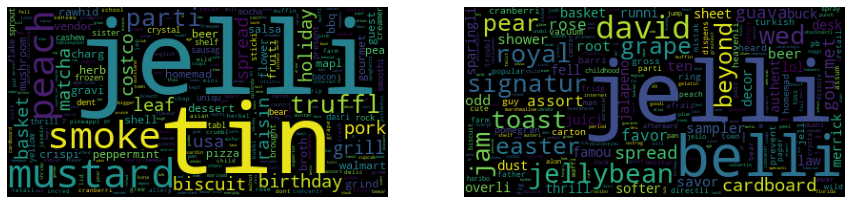

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
# plt.axis[:]("off")
axes[0].imshow(ax1)
axes[0].axis("off")
axes[1].imshow(ax2)
axes[1].axis("off")

As you can see in some particular clusters we have similar type of products. this doen's apply for every cluster

## Question 2 : Provide the number of product in each cluster

In [96]:
slice1.groupby('cluster_number').ProductId.count()[1:]

cluster_number
1    551067
2      8207
3       768
4      2319
5      1460
6       100
7       102
8        70
Name: ProductId, dtype: int64

### Question 3 : Compute the reviews' score distribution in each cluster. Once you get them, test if their mean differences are statistically significant!

In [97]:
def destribution_plot(slice1,a):
    
    
    cluster1 = slice1[slice1.cluster_number == a]  
    
    plt.figure(figsize=(6,4))
    sns.distplot(cluster1["Score"],bins=[1, 2, 3, 4, 5, 6, 7],kde=True) 
    plt.title('reviews score distribution in cluster' +str(a))

    
    return()

C:\Users\Dario\anaconda3\envs\DataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dario\anaconda3\envs\DataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dario\anaconda3\envs\DataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

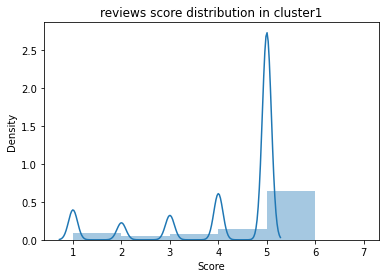

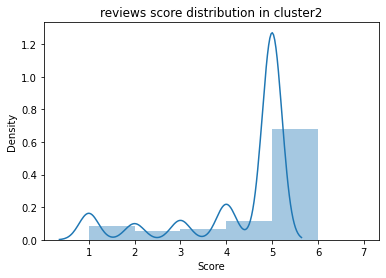

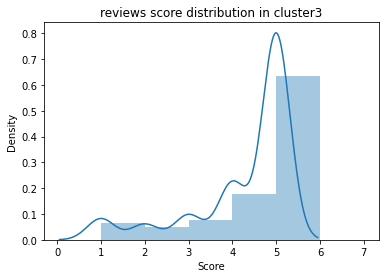

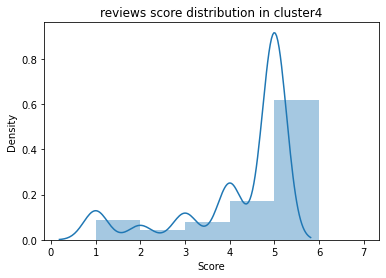

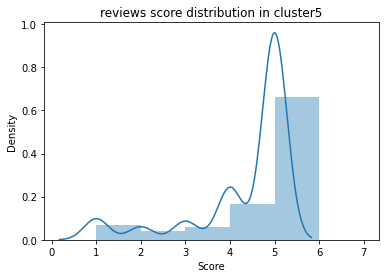

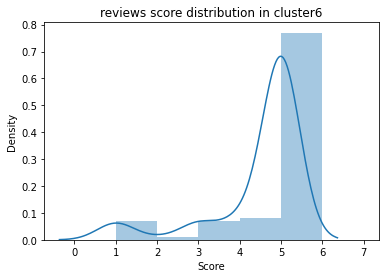

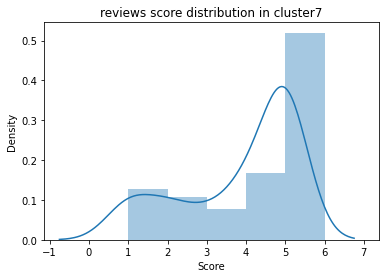

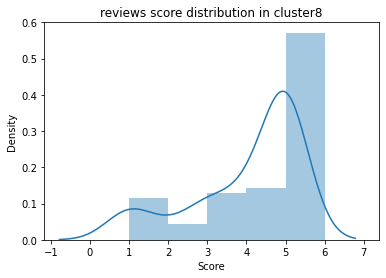

In [99]:
for i in range(1,9):
    try:
        destribution_plot(slice1,i)
    except:
         continue

In [100]:
slice1.groupby('cluster_number').Score.count()[1:]

cluster_number
1    551067
2      8207
3       768
4      2319
5      1460
6       100
7       102
8        70
Name: Score, dtype: int64

## 4.Get the number of unique users writing reviews in each cluster :

In [101]:
slice1.groupby(['cluster_number'])['UserId'].nunique().reset_index()[1:]

,cluster_number,UserId
1,1,247908
2,2,5915
3,3,715
4,4,2103
5,5,1321
6,6,100
7,7,102
8,8,70


# 3. Algorithmic question

You are given an array A with n integer numbers.

Let s = min{ A[1], ..., A[n] } 
and b = max { A[1], ..., A[n] }.

Let r = b - s 
    
Prove that we can sort A in time O(n + r).

## Answer

To answer the question we can use a known sorting algorithm: *Counting Sort* .

This algorithm sort an array of n integer numbers in $O(n + r)$

It use an auxiliar array to sort the first one.


**Counting Sort**:

* Take as input an array A of a known lenght n with integers
* Find minimum and maximum values in the given array &rarr; each operation costs $O(n)$
* Define the *range:* $r = max - min$
* Create a new auxiliar array, initially with all zero values, with size: $r + 1$ 
* Scan the original array
* For each element i increase the counter in the corrisponding index in the second array in this way: 

    $array1[i] = x$ 
    
    $array2[x-min] +=1$
    
   This operation costs $O(n)$
* Scan the auxiliary array and, for each non-zero element e indexed by i in array2, keep overwriting the original array array1 reporting i+min for e times. This operation costs $O(r)$

* Now the array is sorted


The overall time complexity is $O(n + r)$
    
The disvantage of this algorithm is the necessity to use an auxiliar array



Below an example of counting_sort algorithm 

In [81]:
def counting_sort(arr):
    # Find min and max. Costo: O(n) + O(n)
    print('Initial array: ', arr)
    minimum = min(arr)
    maximum = max(arr)
    
    # Find the range and create a new auxiliar vector 
    our_range = maximum - minimum +1
    arr_2 = [0] * our_range
    
    print('Maximum: ', maximum)
    print('Minimum: ', minimum)
    print('Range: ', our_range)
    print('Auxiliar array: ', arr_2)
    

    # Scan of first array, count occur. Costo O(n)
    for x in arr:
        index2 = x - minimum
        arr_2[index2] +=1
        print('Auxiliar array: ',arr_2)
        
    print('Auxiliar array at the end: ',arr_2)
    
    # Scan second array and overwrite the first with sorted elements
    
    # "testina di scrittura"
    testina = 0
    for i in range(our_range):
        # while "di scarico" (bisogna scaricare tutte le occorrenze)
        while arr_2[i] > 0:
            val = i + minimum
            arr[testina] = val
            arr_2[i] -= 1
            testina += 1
            print('Auxiliar array: ', arr_2)
            
            
    print('Sorted array: ', arr)        


In [83]:
arr = [10, 5, 2, 7, 5, 6, 4, 6, 8] 
counting_sort(arr)

Initial array:  [10, 5, 2, 7, 5, 6, 4, 6, 8]
Maximum:  10
Minimum:  2
Range:  9
Auxiliar array:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Auxiliar array:  [0, 0, 0, 0, 0, 0, 0, 0, 1]
Auxiliar array:  [0, 0, 0, 1, 0, 0, 0, 0, 1]
Auxiliar array:  [1, 0, 0, 1, 0, 0, 0, 0, 1]
Auxiliar array:  [1, 0, 0, 1, 0, 1, 0, 0, 1]
Auxiliar array:  [1, 0, 0, 2, 0, 1, 0, 0, 1]
Auxiliar array:  [1, 0, 0, 2, 1, 1, 0, 0, 1]
Auxiliar array:  [1, 0, 1, 2, 1, 1, 0, 0, 1]
Auxiliar array:  [1, 0, 1, 2, 2, 1, 0, 0, 1]
Auxiliar array:  [1, 0, 1, 2, 2, 1, 1, 0, 1]
Auxiliar array at the end:  [1, 0, 1, 2, 2, 1, 1, 0, 1]
Auxiliar array:  [0, 0, 1, 2, 2, 1, 1, 0, 1]
Auxiliar array:  [0, 0, 0, 2, 2, 1, 1, 0, 1]
Auxiliar array:  [0, 0, 0, 1, 2, 1, 1, 0, 1]
Auxiliar array:  [0, 0, 0, 0, 2, 1, 1, 0, 1]
Auxiliar array:  [0, 0, 0, 0, 1, 1, 1, 0, 1]
Auxiliar array:  [0, 0, 0, 0, 0, 1, 1, 0, 1]
Auxiliar array:  [0, 0, 0, 0, 0, 0, 1, 0, 1]
Auxiliar array:  [0, 0, 0, 0, 0, 0, 0, 0, 1]
Auxiliar array:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Sorted ar